# 🌐 AI ReAct Agent 구조: 단계별로 쉽게 이해하기

### ✅ 단계 1. "도구 준비하기" (셰프가 조리도구 챙기는 과정)
- 다양한 기능을 위한 **라이브러리 설치**
- OpenAI API와 Tavily 검색 API의 "열쇠" 등록
- GPT 모델을 **두뇌(LLM)** 로 준비

---

### ✅ 단계 2. "에이전트의 능력 추가하기" (AI가 사용할 수 있는 도구 제공)
- 🌐 인터넷 검색 (Tavily)
- 📅 오늘 날짜 확인
- 🎲 무작위 상담 연결 결정 (랜덤 연결 or 대기)
- 🧮 직접 파이썬 코드 실행

---

### ✅ 단계 3. "ReAct 에이전트 생성" (AI가 생각하고 행동하게 만들기)
- LangGraph의 `create_react_agent`로 **계획+행동 가능한 AI** 생성
- ReAct 패턴 = **"생각(Reason)" + "행동(Act)"** 반복해서 문제 해결

---

### ✅ 단계 4. "에이전트에게 일 시켜보기"
- 예: "상담 연결 가능한가요?" → 도구 활용해 판단
- 예: "CSV로 저장해줘" → 직접 파일 생성 지시도 가능

---

💡 **핵심 요약**: 사용자의 질문을 받은 AI가 **스스로 어떤 도구를 쓸지 계획**하고, **도구를 사용해 문제 해결**합니다. 마치 비서가 검색도 하고, 날짜도 알려주고, 코딩도 해주고, 파일도 만들어주는 것처럼요!

# 🧠 ReAct (Reasoning + Acting) 개념 이해하기

## ReAct란?

**ReAct**는 **Reasoning (추론)** 과 **Acting (행동)** 을 결합한 AI 에이전트 패턴입니다.

### 기존 AI vs ReAct Agent

#### 🔵 기존 AI (단순 응답)
```
사용자: "내일 날씨 어때?"
AI: "죄송합니다. 실시간 정보를 알 수 없습니다."
```

#### 🟢 ReAct Agent (생각 + 행동)
```
사용자: "내일 날씨 어때?"

AI 생각: "날씨 정보가 필요하니 검색 도구를 사용해야겠다"
AI 행동: [검색 도구 실행] "내일 서울 날씨"
AI 생각: "검색 결과를 보니 맑고 최고 15도네"
AI 응답: "내일은 맑고 최고기온 15도입니다!"
```

---

## ReAct 작동 원리 (순환 구조)

```
1. Thought (생각): 무엇을 해야 할지 계획
   ↓
2. Action (행동): 필요한 도구 실행
   ↓
3. Observation (관찰): 도구 실행 결과 확인
   ↓
4. Thought (생각): 결과를 바탕으로 다음 단계 계획
   ↓
5. 반복... 최종 답변까지
```

---

## 실제 예시: "오늘 날짜와 AI 트렌드 검색"

```
질문: "오늘 날짜를 알려주고, 2025년 AI 트렌드를 검색해줘"

┌─────────────────────────────────────┐
│ Step 1: Thought (생각)               │
│ "먼저 날짜 도구를 사용해야겠다"       │
└─────────────────────────────────────┘
           ↓
┌─────────────────────────────────────┐
│ Step 2: Action (행동)                │
│ get_today() 실행                     │
└─────────────────────────────────────┘
           ↓
┌─────────────────────────────────────┐
│ Step 3: Observation (관찰)           │
│ 결과: "2025-10-23"                  │
└─────────────────────────────────────┘
           ↓
┌─────────────────────────────────────┐
│ Step 4: Thought (생각)               │
│ "이제 검색 도구로 AI 트렌드를 찾자"  │
└─────────────────────────────────────┘
           ↓
┌─────────────────────────────────────┐
│ Step 5: Action (행동)                │
│ search("2025 AI trends") 실행        │
└─────────────────────────────────────┘
           ↓
┌─────────────────────────────────────┐
│ Step 6: Observation (관찰)           │
│ 결과: "생성형 AI, 멀티모달..."       │
└─────────────────────────────────────┘
           ↓
┌─────────────────────────────────────┐
│ Step 7: Final Answer (최종 답변)     │
│ "오늘은 2025-10-23입니다.            │
│  2025년 AI 트렌드는..."              │
└─────────────────────────────────────┘
```

---

## ReAct의 핵심 구성요소

1. **LLM (두뇌)**: 생각하고 계획하는 역할
2. **Tools (도구)**: 실제 작업을 수행하는 기능들
3. **Agent (에이전트)**: LLM과 도구를 연결하는 조정자
4. **Memory (메모리)**: 이전 대화와 실행 결과 기억

이제 실제 코드로 ReAct Agent를 만들어봅시다!

In [2]:
from langchain_openai import ChatOpenAI

# GPT 모델 인스턴스 생성 (두뇌 역할)
# 👉 포인트: AI의 핵심 엔진 준비
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0
)

print("✅ ChatGPT 모델 초기화 완료!")

/Users/jinhohyeon/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


✅ ChatGPT 모델 초기화 완료!


In [6]:
# -----------------------------------------------------------
# LLM에서 사용할 툴 준비
# 포인트 👉 AI가 실제로 ‘행동’할 수 있게 도구를 연결합니다.
# -----------------------------------------------------------
from langchain_tavily import TavilySearch  # 포인트 👉 인터넷 검색용 도구
from langchain_core.tools import tool      # 포인트 👉 LangChain에서 커스텀 도구를 정의할 때 사용하는 데코레이터
import random                              # 포인트 👉 무작위 결정을 위한 파이썬 기본 모듈
from datetime import datetime              # 포인트 👉 현재 날짜, 시간을 다루는 기본 모듈

# 검색 도구 (최대 5개 결과 반환)
# 포인트 👉 외부 정보를 가져올 수 있는 "인터넷 검색기" 같은 역할입니다.
search_tool = TavilySearch(max_results=5)

# 날짜 도구 (오늘 날짜 반환)
# 포인트 👉 단순하지만 매우 유용한 ‘오늘 날짜 알려주는 도구’입니다.
@tool
def get_today() -> str:
    """현재 날짜를 %Y-%m-%d 형식으로 반환합니다."""  # 포인트 👉 예: "2025-10-23" 형태로 날짜 반환
    return datetime.now().strftime("%Y-%m-%d")

# 상담 연결 여부 무작위 도구
# 포인트 👉 실제 비즈니스 로직처럼, 상담 연결을 무작위로 결정해보는 도구입니다.
@tool
def escalate_decision(issue_summary: str) -> str:
    """간단 이슈에 대해 연결/대기 중 하나를 반환합니다."""  # 포인트 👉 예시: "환불 문의" → "연결" 또는 "대기"
    if random.random() >= 0.5:  # 포인트 👉 50% 확률로 연결/대기 결정
        return "연결"
    else:
        return "대기"

# 도구 목록
# 포인트 👉 AI에게 “이런 도구들을 사용할 수 있다”라고 알려주는 리스트입니다.
tools = [search_tool, get_today, escalate_decision]

# 도구 테스트 실행
# 포인트 👉 각 도구가 잘 작동하는지 미리 점검합니다.
print("오늘 날짜:", get_today.invoke({}))  # 포인트 👉 날짜 도구 테스트
print("상담 연결 결정:", escalate_decision.invoke({"issue_summary": "환불 지연 문의"}))  # 포인트 👉 무작위 상담 연결 테스트
print("✅ 도구 준비 완료!")  # 포인트 👉 도구 세팅 완료 알림



오늘 날짜: 2025-12-29
상담 연결 결정: 연결
✅ 도구 준비 완료!


# 🎯 방법 1: Prebuilt ReAct Agent (간단한 시작)

LangGraph가 제공하는 `create_react_agent`를 사용하여 빠르게 ReAct 에이전트를 만들 수 있습니다.

In [7]:

# 🎯 방법 1: Prebuilt ReAct Agent (간단한 시작)
# 포인트 👉 이미 만들어진 ReAct Agent 템플릿을 사용해서 빠르게 작동 확인해볼 수 있습니다.

from langgraph.prebuilt import create_react_agent  # 포인트 👉 LangGraph에서 제공하는 자동화된 ReAct Agent 생성기
from langchain_core.messages import HumanMessage    # 포인트 👉 사람의 입력 메시지를 표현하는 객체

# ReAct 에이전트 그래프 생성
# 포인트 👉 GPT(두뇌) + 도구(행동)를 결합해서 “생각하고 행동할 수 있는” AI를 만드는 핵심 부분입니다.
prebuilt_agent = create_react_agent(llm, tools=tools)

print("✅ Prebuilt ReAct Agent 생성 완료!")  # 포인트 👉 기본 ReAct Agent 성공적으로 만들어졌는지 확인


✅ Prebuilt ReAct Agent 생성 완료!


In [8]:
# 단발 실행 예시 (질문 → 답변)
# 포인트 👉 한 번의 질문으로 AI가 어떻게 반응하는지 테스트합니다.
response = prebuilt_agent.invoke({
    'messages': [HumanMessage(content="상담 연결 가능한가요?")]
})

print("\n최종 답변:")
print(response['messages'][-1].content)  # 포인트 👉 AI의 마지막 답변을 출력


최종 답변:
상담 연결 요청이 접수되었습니다. 잠시만 기다려 주시기 바랍니다.


In [9]:
# 스트리밍 실행 예시 (실행 과정 관찰)
print("\n" + "="*60)
print("ReAct Agent 실행 과정 (Thought → Action → Observation)")
print("="*60 + "\n")

for event in prebuilt_agent.stream(
    {'messages': [HumanMessage(content="오늘 날짜를 알려주고, 2025년 AI 트렌드를 검색해서 요약해줘")]},
    stream_mode='updates'
):
    for node_name, node_data in event.items():
        print(f"\n[{node_name}]")
        if 'messages' in node_data:
            for msg in node_data['messages']:
                if hasattr(msg, 'content') and msg.content:
                    print(f"  💬 {msg.content[:200]}..." if len(msg.content) > 200 else f"  💬 {msg.content}")
                elif hasattr(msg, 'tool_calls') and msg.tool_calls:
                    for tc in msg.tool_calls:
                        print(f"  🔧 도구 실행: {tc['name']}")
        print("-" * 60)


ReAct Agent 실행 과정 (Thought → Action → Observation)


[agent]
  🔧 도구 실행: get_today
  🔧 도구 실행: tavily_search
------------------------------------------------------------

[tools]
  💬 2025-12-29
------------------------------------------------------------

[tools]
  💬 {"query": "2025 AI trends", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.deloitte.com/us/en/what-we-do/capabilities/applied-artificial-intelligence/blogs...
------------------------------------------------------------

[agent]
  💬 오늘 날짜는 **2025년 12월 29일**입니다.

2025년의 AI 트렌드에 대한 요약은 다음과 같습니다:

1. **에이전틱 AI (Agentic AI)**: 독립적으로 작업을 수행하는 AI의 발전이 두드러질 것으로 예상됩니다. 이는 AI 프로그램들이 협력하여 실제 작업을 수행하는 방향으로 나아가고 있으며, 많은 기술 전문가들이 이 가능성에 대해 기대...
------------------------------------------------------------


# 🧠 LangGraph 커스텀 ReAct Agent 흐름 이해하기

### 🔹 단계 1: 상태 정의
- "대화 히스토리(event_log)"라는 상태를 만들고 기억합니다.

### 🔹 단계 2: 두뇌 + 도구 연결
- GPT AI(두뇌)와 다양한 도구(검색, 날짜, 코드 실행 등)를 연결합니다.

### 🔹 단계 3: 노드 구성
- 🧠 planner: AI가 "무엇을 해야 할지" 계획합니다.
- 🧰 executor: AI가 계획한 도구를 실제로 실행합니다.

### 🔹 단계 4: 흐름 설계 (반복 루프)
- planner ↔ executor를 순환하며, 도구가 더 필요 없을 때 종료됩니다.

🎯 핵심: 사용자의 질문 → AI가 도구 활용 계획 → 실행 → 다시 계획 → 답변 완성!

In [10]:
# -----------------------------------------------------------
# 커스텀 LangGraph 구성
# 👉 포인트: 직접 설계해서 맞춤형 AI 흐름도 작성
# -----------------------------------------------------------
from typing import TypedDict, Annotated
from langgraph.graph.message import add_messages

# 상태 타입 정의 (CRMFlowState = 상담 로그 기록 상태)
class CRMFlowState(TypedDict):
    event_log: Annotated[list, add_messages]

# LLM과 툴을 묶은 어시스턴트 생성
assistant_with_skills = llm.bind_tools(tools)

print("✅ LLM과 도구 연결 완료!")

✅ LLM과 도구 연결 완료!


In [11]:
# -----------------------------------------------------------
# 🧠 커스텀 ReAct Agent 노드 정의
# -----------------------------------------------------------
# ReAct = "Reason + Act"
# 👉 LLM이 스스로 생각(Reasoning)하고, 필요한 도구를 실행(Acting)하도록 설계한 구조입니다.
# 👉 여기서는 ‘Planner(계획 세우기)’와 ‘Executor(실행하기)’ 단계를 직접 나눠 구현했습니다.
# -----------------------------------------------------------

from langchain_core.messages import ToolMessage, SystemMessage  # 도구 실행 결과/시스템 메시지용 클래스

# 🧰 툴 레지스트리: 도구 이름 → 실제 도구 객체 매핑
# 👉 LLM이 "검색" 같은 도구 이름을 호출하면, 실제로 어떤 함수인지 연결시켜줍니다.
registry = {skill.name: skill for skill in tools}


# -----------------------------------------------------------
# 🧩 Planner (계획 세우기 단계)
# -----------------------------------------------------------
# 👉 LLM이 사용자 요청을 보고 어떤 도구를 쓸지 “생각”하는 부분입니다.
def planner(session_ctx):
    """AI가 무엇을 해야 할지 생각합니다 (Thought 단계)"""
    policy_prompt = SystemMessage("""
당신은 ReAct (Reasoning + Acting) 패턴의 AI 어시스턴트입니다.

[작동 방식]
1️⃣ Thought: 사용자 요청을 분석하고 어떤 도구를 쓸지 생각하세요
2️⃣ Action: 필요한 도구를 실행하세요
3️⃣ Observation: 실행 결과를 보고 판단하세요
4️⃣ 필요하면 다시 반복하세요

⚠️ 주의:
- 왜 그 도구를 쓰는지 간단히 설명하세요.
- 에러가 나면 다른 방법을 시도하세요.
""")

    plan_or_answer = assistant_with_skills.invoke(
        [policy_prompt] + session_ctx["event_log"]  # 지시문 + 대화기록 전달
    )
    return {'event_log': [plan_or_answer]}  # 새로운 계획 메시지를 로그에 추가


# -----------------------------------------------------------
# ⚙️ Executor (도구 실행 단계)
# -----------------------------------------------------------
# 👉 LLM이 “이 도구를 써야겠다”고 결정하면,
#    그 도구를 실제로 실행하는 부분입니다.
def run_toolbox(session_ctx):
    """AI가 계획한 도구를 실제 실행합니다 (Action 단계)"""
    action_results = []
    pending_call = session_ctx['event_log'][-1]  # 마지막 대화에서 도구 호출 정보 확인

    for call_spec in getattr(pending_call, "tool_calls", []):  # 여러 도구를 한 번에 실행할 수도 있음
        selected_tool = registry[call_spec['name']]             # 이름으로 도구 찾기
        exec_output = selected_tool.invoke(call_spec['args'])   # 도구 실제 실행
        action_results.append(
            ToolMessage(
                content=str(exec_output),
                tool_call_id=call_spec['id']
            )
        )

    return {'event_log': action_results}  # 실행 결과를 로그에 추가해서 반환


# -----------------------------------------------------------
# 🔁 다음 단계 결정 (도구 실행이 필요한가?)
# -----------------------------------------------------------
# 👉 Planner가 만든 메시지를 보고 도구 실행 단계로 넘어갈지, 바로 답변할지 판단합니다.
def need_more_tools(session_ctx):
    """다음 단계가 도구 실행인지, 종료인지 판단"""
    tail_msg = session_ctx['event_log'][-1]
    if getattr(tail_msg, "tool_calls", None):  # 도구 호출이 있다면 실행 단계로 이동
        return "next"
    else:
        return "done"  # 도구 호출이 없다면 이제 답변 준비 완료!

print("✅ ReAct 커스텀 노드 정의 완료!")  # 설정 완료 알림


✅ ReAct 커스텀 노드 정의 완료!


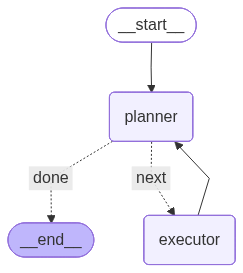

In [12]:
# -----------------------------------------------------------
# 그래프 빌드/컴파일 (상담 흐름도 설계)
# 👉 포인트: planner ↔ executor 구조로 순환하며 실행
# -----------------------------------------------------------
from langgraph.graph import StateGraph, START, END

flow_designer = StateGraph(CRMFlowState)
flow_designer.add_node("planner", planner)       # 계획 세우기
flow_designer.add_node("executor", run_toolbox)  # 도구 실행

flow_designer.add_edge(START, "planner")  # 시작 → 계획
flow_designer.add_conditional_edges(
    "planner",
    need_more_tools,
    {"next": "executor", "done": END}
)
flow_designer.add_edge("executor", "planner")  # 실행 후 다시 계획으로

custom_agent = flow_designer.compile()
custom_agent


In [13]:
# 커스텀 그래프 단발 실행 예시
response = custom_agent.invoke({
    'event_log': [HumanMessage(content="최근 고객 불만 동향을 검색해서 요약해줘.")]
})

print("\n최종 답변:")
print(response['event_log'][-1].content)


최종 답변:
최근 고객 불만 동향에 대한 주요 내용은 다음과 같습니다:

1. **Coupang 데이터 유출 사건**: Coupang의 창립자 김범석은 3,370만 고객의 개인 정보가 유출된 사건에 대해 공개 사과했습니다. 그는 초기 대응과 소통 부족에 대해 깊이 반성하며, 고객의 불안감을 이해한다고 밝혔습니다. 이 사건으로 인해 많은 고객들이 보안에 대한 우려를 표명하고 있습니다. [기사 링크](https://www.koreatimes.co.kr/southkorea/politics/20251228/coupang-founder-apologizes-over-massive-data-breach-but-refuses-again-to-attend-parliamentary-hearing)

2. **집단 소송**: 약 50만 명의 Coupang 사용자들이 데이터 유출에 대한 집단 소송에 참여하고 있으며, 각 원고는 10만 원에서 100만 원의 손해배상을 청구하고 있습니다. 이 사건에 대한 고객들의 불만은 데이터 유출보다 Coupang의 대응에 더 큰 비중을 두고 있습니다. [기사 링크](https://koreajoongangdaily.joins.com/news/2025-12-25/business/industry/Nearly-half-a-million-Coupang-users-join-class-action-over-data-leak/2486653)

3. **미국 내 소송**: Coupang은 미국 내 투자자들로부터 데이터 유출에 대한 적절한 공시를 하지 않았다는 이유로 소송을 당했습니다. 이 사건은 고객의 개인 정보가 유출된 것 외에도 회사의 보안 프로토콜이 부적절하다는 주장을 포함하고 있습니다. [기사 링크](https://www.csoonline.com/article/4111091/south-korean-firm-hit-with-us-investor-lawsuit-over-data-breach-disclosure-failures.html)

이러한 사건들은 고객

In [14]:
# 커스텀 그래프 스트리밍 실행 예시
print("\n" + "="*60)
print("커스텀 ReAct Agent 실행 과정")
print("="*60 + "\n")
for update_evt in custom_agent.stream(
    {'event_log': [HumanMessage(content="오늘 날짜와 2025년 AI 트렌드를 검색해서 알려줘")]},
    stream_mode='updates'
):
    for node_name, node_data in update_evt.items():
        print(f"\n[{node_name}]")  # 포인트 👉 현재 실행 중인 노드 이름 표시
        if 'event_log' in node_data:
            for msg in node_data['event_log']:
                if hasattr(msg, 'content') and msg.content:
                    print(f"  💬 {msg.content[:200]}..." if len(msg.content) > 200 else f"  💬 {msg.content}")
                elif hasattr(msg, 'tool_calls') and msg.tool_calls:
                    for tc in msg.tool_calls:
                        print(f"  🔧 도구 실행: {tc['name']}")  # 포인트 👉 어떤 도구가 실행되는지 실시간 표시
        print("-" * 60)


커스텀 ReAct Agent 실행 과정


[planner]
  🔧 도구 실행: get_today
  🔧 도구 실행: tavily_search
------------------------------------------------------------

[executor]
  💬 2025-12-29
  💬 {'query': '2025 AI trends', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.constellationr.com/blog-news/insights/2025-review-ai-trends-buy-side-and-sell-si...
------------------------------------------------------------

[planner]
  💬 오늘 날짜는 **2025년 12월 29일**입니다.

2025년의 AI 트렌드에 대한 정보는 다음과 같습니다:

1. **Generative AI의 확산**: Generative AI는 콘텐츠 생성, 워크플로우 자동화 등 다양한 산업을 재편하는 데 중요한 역할을 할 것으로 예상됩니다. 많은 기업들이 이 기술을 플랫폼에 통합하여 사용하게 될 것입니다. (출처...
------------------------------------------------------------


# 🎓 실습 과제

1. **새로운 도구 추가**: 계산기, 번역기 등 커스텀 도구를 만들어보세요
2. **복잡한 질문 시도**: "오늘 날짜 + 검색 + 계산"을 한 번에 요청해보세요
3. **실행 과정 관찰**: 스트리밍 모드로 ReAct 패턴을 확인하세요
4. **시스템 프롬프트 수정**: planner의 지침을 변경하여 동작 변화를 관찰하세요

---

## 📚 핵심 정리

### ReAct = Reasoning (생각) + Acting (행동)

- **Prebuilt Agent**: 빠른 시작, 간단한 사용
- **Custom Agent**: 세밀한 제어, 프로덕션 레벨

### ReAct 흐름
```
Thought → Action → Observation → Thought → ... → Answer
```

이 패턴을 이해하면 복잡한 AI 에이전트를 자유자재로 만들 수 있습니다!